# Hockey Project

##### Is it true that "cheaters never win"?

In a sport which produces outcomes more dependent on "luck," or at least random outcomes [CITE], is it any wonder that games often come down to the built-in advantage produced by the power play? Football relies on violence as an inherent aspect of the sport. Baseball, for instance, does not require the first baseman to deck the runner to get him out (though there are plenty of perceived dirty tactics, such as the takeout slide and throwing at a runner, though we'll ignore those for now). Though basketball requires plenty of physicality, from scrapping for rebounds and on defense to setting hard screens, and has had its share of brawls (see Palace, Malice at the or Jeff van Gundy famously clinging to Alonzo Mourning's leg), hockey is perhaps unique among the pantheon of American sports for its usage of controlled violence. A hard yet clean hit can change the momentum of a game, while an ill-advised penalty can do the same in the opposite direction. Hockey is also the only sport where, if the referees so allow it, players can openly fight, though this is due to the fact that they cannot fully gather their weight behind a punch on their unique playing surface. Hockey also has produced its fair share of "enforcers," players whose job is mostly if not wholly to bring their team a physical edge. Though this has resulted in plenty of dirty hits and players (*cough* Tom Wilson *cough*, *cough* Brad "Shootout King" Marchand *cough*), it also produces (synonym) an entirely different side to the game. 

This physical side of hockey can both result in penalties or in drawing penalties, which leads to power plays (or, as Sebastien Aho lovingly calls them, PPs). (Statistics on Power-Play advantages)

At home games, immediately before the beginning of a visitor's power play, the Carolina Hurricanes play the iconic *dun dun* of *Law and Order* fame, prompting the fans to gleefully scream: "Cheaters never win!" The team is rather ambiguous on what that word precisely means, however. According to *Webster's Dictionary*, ... (just kidding, y'all). I recently wondered exactly what they meant. What, exactly, is a cheater in this context? And, if we can find a satisfying explanation, is it indeed true that they never win?

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
hockey_df = pd.read_csv('canes.csv')

hockey_df.shape

(1876, 29)

In [13]:
hockey_df.head()

,year,date_game,game_location,opp_name,goals,opp_goals,game_outcome,overtimes,shots,pen_min,goals_pp,chances_pp,goals_sh,shots_against,pen_min_opp,goals_against_pp,opp_chances_pp,goals_against_sh,corsi_for,corsi_against,corsi_pct,fenwick_for,fenwick_against,fenwick_pct,faceoff_wins,faceoff_losses,faceoff_percentage,zs_offense_pct,pdo
0,1998,1997-10-01,A,Tampa Bay Lightning,2.0,4.0,L,NaN,29.0,39.0,1.0,NaN,0.0,27.0,39.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,1997-10-03,H,Pittsburgh Penguins,3.0,4.0,L,NaN,28.0,72.0,2.0,NaN,0.0,27.0,43.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,1997-10-04,A,Ottawa Senators,2.0,3.0,L,NaN,18.0,16.0,1.0,NaN,0.0,27.0,10.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,1997-10-07,H,Los Angeles Kings,3.0,3.0,T,OT,29.0,18.0,0.0,NaN,0.0,30.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,1997-10-10,H,New Jersey Devils,2.0,1.0,W,NaN,27.0,8.0,0.0,NaN,0.0,17.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first thing I had to do was get game data for Hurricanes games since their inaugural season in North Carolina in 1997 (sorry, Whalers fans - I love your logo and jerseys <3). Though it's unclear to me when the Canes started using this power play intro (what am I gonna do, reach out to the team for a personal project?), I got the game logs for every regular season game played by the Carolina Hurricanes before separating out home games (we'll explore more broadly later) from Hockey Reference. In the process I discovered I had forgotten about the lockout season since there's no page for the 2005 game data. Though more recent seasons have more statistics tracked (thanks, sabermetrics!), I got a solid 940 games to work with, with complete statistics like shots, penalty minutes, and more [FOOTNOTE FOR COMPLETE LIST]. 

In [14]:
games_home = hockey_df[hockey_df['game_location'] == 'H']
games_home['game_outcome'] = games_home['game_outcome'].apply(lambda x : 1 if x == 'W' else 0)

games_home.shape

(940, 29)

In [15]:
games_home.head()

,year,date_game,game_location,opp_name,goals,opp_goals,game_outcome,overtimes,shots,pen_min,goals_pp,chances_pp,goals_sh,shots_against,pen_min_opp,goals_against_pp,opp_chances_pp,goals_against_sh,corsi_for,corsi_against,corsi_pct,fenwick_for,fenwick_against,fenwick_pct,faceoff_wins,faceoff_losses,faceoff_percentage,zs_offense_pct,pdo
1,1998,1997-10-03,H,Pittsburgh Penguins,3.0,4.0,0,NaN,28.0,72.0,2.0,NaN,0.0,27.0,43.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,1997-10-07,H,Los Angeles Kings,3.0,3.0,0,OT,29.0,18.0,0.0,NaN,0.0,30.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,1997-10-10,H,New Jersey Devils,2.0,1.0,1,NaN,27.0,8.0,0.0,NaN,0.0,17.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,1997-10-15,H,Buffalo Sabres,3.0,3.0,0,OT,37.0,12.0,2.0,NaN,1.0,28.0,10.0,3.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1998,1997-10-22,H,St. Louis Blues,4.0,3.0,1,NaN,26.0,8.0,0.0,NaN,0.0,31.0,4.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, let's take a very simplistic approach. Can we predict whether the Canes win a home game based on how many penalty minutes their opponent has? It might seem right that the "cheaters never win" line, since it plays only for opponent power plays, correlates with the opponent's actions. Let's plot some data first to see if we're on the right track.

In [16]:
result = np.array(games_home['game_outcome'])

In [22]:
opp_pim = np.array(games_home['pen_min_opp'].fillna(0))

opp_pim_reshape = opp_pim.reshape((opp_pim.shape[0], 1))

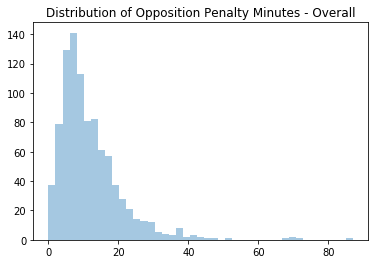

In [23]:
sns.distplot(opp_pim, kde=False).set_title('Distribution of Opposition Penalty Minutes - Overall')

plt.show()

In [24]:
opp_pim_wins = np.array(games_home[games_home['game_outcome'] == 1]['pen_min_opp'].fillna(0))
opp_pim_losses = np.array(games_home[games_home['game_outcome'] == 0]['pen_min_opp'].fillna(0))

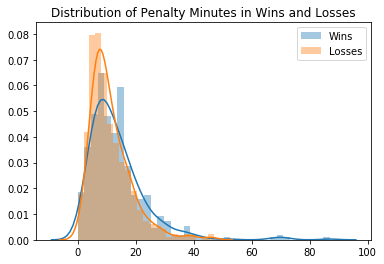

In [33]:
ax = sns.distplot(opp_pim_wins, label='Wins')
sns.distplot(opp_pim_losses, label='Losses', ax=ax)

ax.set_title('Distribution of Penalty Minutes in Wins and Losses')

plt.legend()
plt.show()

From the plots, it seems that it might be hard to separate and predict wins and losses purely from opposition penalty minutes alone. Though there seem to be larger peaks for wins to the right of the peaks of the losses, the overall fit to the distributions is rather similar. Nevertheless, we persist! We shall produce a logistic regression model (fancy speak for trying to predict a 1/win or a 0/loss based on somee data) for this purpose.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [75]:
range_c = 10

param_grid_reg = {
    'C' : [10**i for i in range(-range_c, range_c+1) if i != 0],
    'fit_intercept' : [True, False]
}
# param_grid = {
#     'logistic__C' : [10**i for i in range(-range_c, range_c+1) if i != 0],
#     'logistic__fit_intercept' : [True, False]
# }

# pipe_min_max = Pipeline([
#     ('scale', MinMaxScaler()),
#     ('logistic', LogisticRegression())
# ])

# pipe_standard = Pipeline([
#     ('scale', StandardScaler()),
#     ('logistic', LogisticRegression())
# ])

grid_search_reg = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_reg, cv=5)
# grid_search_min_max = GridSearchCV(pipe_min_max, param_grid=param_grid, cv=5)
# grid_search_standard = GridSearchCV(pipe_standard, param_grid=param_grid, cv=5)

grid_search_reg.fit(opp_pim_reshape, result)
# grid_search_min_max.fit(opp_pim_reshape, result)
# grid_search_standard.fit(opp_pim_reshape, result)

print (grid_search_reg.score(opp_pim_reshape, result))
# print (grid_search_min_max.score(opp_pim_reshape, result))
# print (grid_search_standard.score(opp_pim_reshape, result))

0.5553191489361702


In [76]:
best = grid_search_reg.best_estimator_
# min_max_best = grid_search_min_max.best_estimator_.named_steps['logistic']
# standard_best = grid_search_standard.best_estimator_.named_steps['logistic']

coefs = best.coef_
intercept = best.intercept_

# min_max_coefs = min_max_best.coef_
# min_max_intercept = min_max_best.intercept_

# standard_coefs = standard_best.coef_
# standard_intercept = standard_best.intercept_

print (coefs, intercept)
# print (min_max_coefs, min_max_intercept)
# print (standard_coefs, standard_intercept)

[[0.0294854]] [-0.35867749]


By using some math, we can see what barrier of penalty minutes it takes for the model to predict a Canes win:

$$ \frac{1}{1+e^{-(m \bullet x+b)}} = \frac{1}{2} $$

$$ 2 = 1 + e^{-(m \bullet x+b)} $$

$$ 1 = e^{-(m \bullet x+b)} $$

$$ 0 = -(m \bullet x+b) $$

$$ 0 = m \bullet x + b $$

$$ x = -b/m $$

We have already found these values with our model, so all it remains to do is find x!

In [77]:
-intercept[0]/coefs[0][0]

12.164578971145282

We can see that if the opponent has more than about 12 penalty minutes, the model will predict a Canes win; otherwise, a Canes loss is predicted. However, since this model only produced about 56% accuracy, we should be looking for something that does a little better.

In [78]:
corr = np.corrcoef(games_home[['game_outcome', 'pen_min_opp']].fillna(0).to_numpy(), rowvar=False)

corr

array([[1.        , 0.12249083],
       [0.12249083, 1.        ]])

We can also see that the correlation coefficient between penalty minutes and the outcome is a measly .12, showing that we are perhaps misguided in using this simple definition.

## Cheater Definition 2

Alright, take two: what if we define a "cheater" as whichever team has more penalty minutes? How often does this match with the result of the game?

In [53]:
games_home['pen_min'] = games_home['pen_min'].fillna(0)
games_home['pen_min_opp'] = games_home['pen_min_opp'].fillna(0)

games_home['more_pim'] = games_home['pen_min'] < games_home['pen_min_opp']
games_home['more_pim'] = games_home['more_pim'].apply(lambda x : 1 if x else 0)

In [54]:
more_pim = np.array(games_home['more_pim'])

In [55]:
equal_results = (more_pim == result) 

np.sum(equal_results) / equal_results.shape[0]

0.5191489361702127

Hmm, so the team that has more penalty minutes only wins about 52% of the time. This is an interesting result, but it certainly does not help us in our question to definee the NHL cheater.

If we define a Canes win with the Canes having less penalty minutes as a "true positive," a Canes loss with the other team having less penalty minutes as a "true negative," a Canes win with the Canes having more penalty minutes as a "false positive," and a Canes loss with the other team having more penalty minutes as a "false negative," we can produce what we call a confusion matrix.

In [60]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [63]:
print (confusion_matrix(result, more_pim))

print (confusion_matrix(result, more_pim, normalize='all'))

[[209 259]
 [193 279]]
[[0.22234043 0.27553191]
 [0.20531915 0.29680851]]


In [64]:
corr = np.corrcoef(games_home[['game_outcome', 'more_pim']].to_numpy(), rowvar=False)

corr

array([[1.        , 0.03808325],
       [0.03808325, 1.        ]])

## Cheater Definition 3

How about if we try to predict the winner based on the difference between the opponent's penalty minutes and the Canes'? Our intuition tells us tells us that a negative number (the Canes having more penalty minutes) probably means a Canes loss. This may seem exactly the same as the last (and it is admittedly quite similar), but this enables us to produce more nuance than a mere binary variable based on which team has more penalty minutes.

In [65]:
games_home['pim_diff'] = games_home['pen_min_opp'] - games_home['pen_min']

In [67]:
pim_diff = np.array(games_home['pim_diff'])

In [70]:
pim_diff_wins = np.array(games_home[games_home['game_outcome'] == 1]['pim_diff'])
pim_diff_losses = np.array(games_home[games_home['game_outcome'] == 0]['pim_diff'])

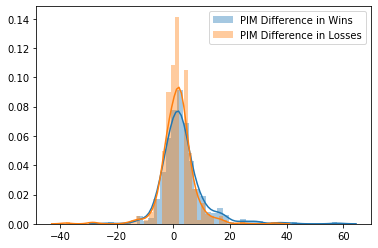

In [71]:
ax = sns.distplot(pim_diff_wins, label='PIM Difference in Wins')
sns.distplot(pim_diff_losses, label='PIM Difference in Losses', ax=ax)

plt.legend()
plt.show()

Notes on the plots

In [87]:
grid_search = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_reg, cv=5)

pim_diff_reshape = pim_diff.reshape((pim_diff.shape[0], 1))

grid_search.fit(pim_diff_reshape, result)

grid_search.score(pim_diff_reshape, result)

0.5191489361702127

In [84]:
-grid_search.best_estimator_.intercept_[0]/grid_search.best_estimator_.coef_[0][0]

1.9562914880212416

Note on this result.